In [23]:
import pandas as pd
import matplotlib.pyplot as plt

We will try to find answers for the following questions:


What are the causes of death in this dataset?

What is the total number of deaths in the United State from 1999 to 2015?

What is the trend of number of deaths per year?

Which are the 10 states that have the highest number of death in all years?

What are the top causes of deaths in the United State?

In [24]:
import pandas as pd
f_location = 'NCHS.csv'

data = pd.read_csv(f_location)
df = pd.DataFrame(data)

In [25]:
df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     10868 non-null  int64  
 1   113 Cause Name           10868 non-null  object 
 2   Cause Name               10868 non-null  object 
 3   State                    10868 non-null  object 
 4   Deaths                   10868 non-null  int64  
 5   Age-adjusted Death Rate  10868 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.6+ KB


In [27]:
df.columns.tolist()

['Year',
 '113 Cause Name',
 'Cause Name',
 'State',
 'Deaths',
 'Age-adjusted Death Rate']

In [28]:
df.isna().sum()

Year                       0
113 Cause Name             0
Cause Name                 0
State                      0
Deaths                     0
Age-adjusted Death Rate    0
dtype: int64

What are the causes of death in this dataset?

In [29]:
causes = df["Cause Name"].unique()
causes

array(['Unintentional injuries', 'All causes', "Alzheimer's disease",
       'Stroke', 'CLRD', 'Diabetes', 'Heart disease',
       'Influenza and pneumonia', 'Suicide', 'Cancer', 'Kidney disease'],
      dtype=object)

In [30]:
df = df[df["Cause Name"] != "All causes"]


In [31]:
causes = df["Cause Name"].unique()
len(causes)

10

In [32]:
df["State"].unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [33]:
df = df[df["State"] != "United States"]

In [35]:
states = df.State.unique()
len(states)

51

What is the total number of deaths in the United State from 1999 to 2017?

In [37]:
df["Deaths"].sum()

36280583

What is the trend of number of deaths per year?


In [58]:
death_per_year = df.groupby(["Year"])[["Deaths","Age-adjusted Death Rate"]].sum().reset_index()
death_per_year.head()

,Year,Deaths,Age-adjusted Death Rate
0,1999,1905826,35592.3
1,2000,1902194,35161.3
2,2001,1899358,34580.3
3,2002,1918873,34429.2
4,2003,1912115,33846.1


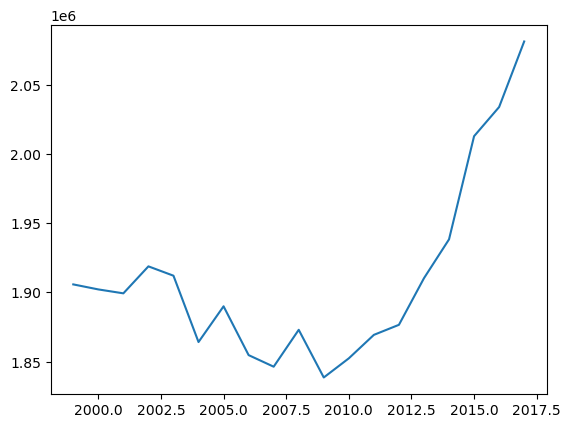

In [70]:
plt.plot(death_per_year["Year"].astype(int),death_per_year["Deaths"])
plt.show()


Which are the 10 states that have the highest number of death in all years?

In [78]:
dStates = df.groupby("State")[["Year","Deaths","Age-adjusted Death Rate"]].sum().reset_index()
dStates.sort_values("Deaths",inplace=True,ascending=False)
dStates.head(10)

,State,Year,Deaths,Age-adjusted Death Rate
4,California,381520,3594261,10378.3
9,Florida,381520,2533472,10434.4
43,Texas,381520,2367695,11506.8
32,New York,381520,2264120,10519.1
38,Pennsylvania,381520,1854953,11643.4
35,Ohio,381520,1605250,12356.6
13,Illinois,381520,1508039,11376.9
22,Michigan,381520,1313813,12061.7
33,North Carolina,381520,1115953,11976.7
30,New Jersey,381520,1030622,10573.2


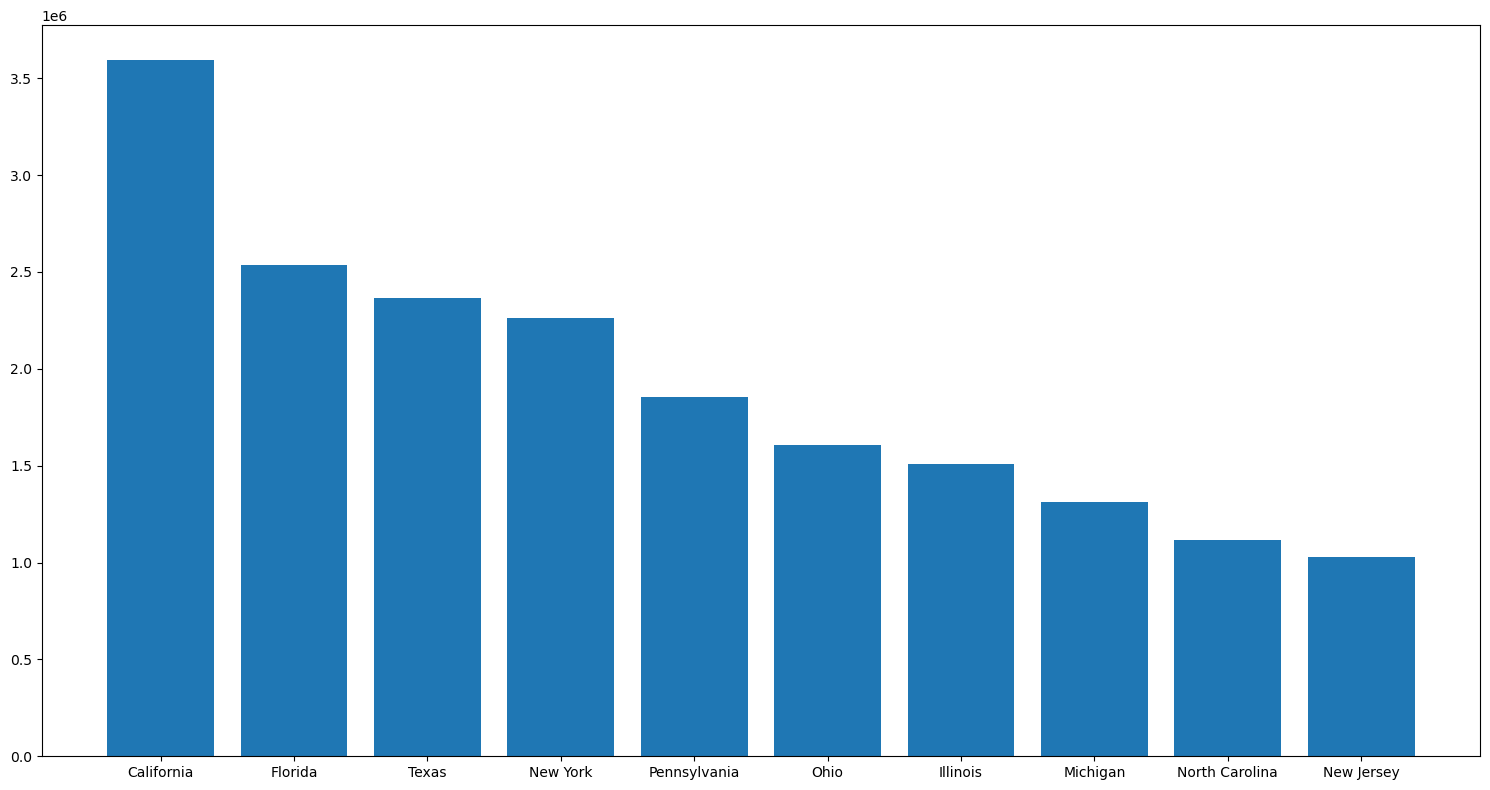

In [88]:
plt.figure(figsize=(15, 8))
plt.bar(dStates["State"].head(10),dStates["Deaths"].head(10))
plt.tight_layout()


What are the top causes of deaths in the United State?

In [96]:
dCauses = df.groupby(["Cause Name"])[["Deaths","Age-adjusted Death Rate"]].sum()
dCauses

,Deaths,Age-adjusted Death Rate
Cause Name,,
Alzheimer's disease,1494816,24256.0
CLRD,2594927,43253.4
Cancer,10843644,173078.6
Diabetes,1399943,22677.4
Heart disease,12222640,191798.4
Influenza and pneumonia,1094641,17641.1
Kidney disease,858613,13633.6
Stroke,2726523,44476.9
Suicide,697016,13019.9


<Axes: title={'center': 'Main 10 causes of Death in USA since 1999'}, xlabel='Cause Name'>

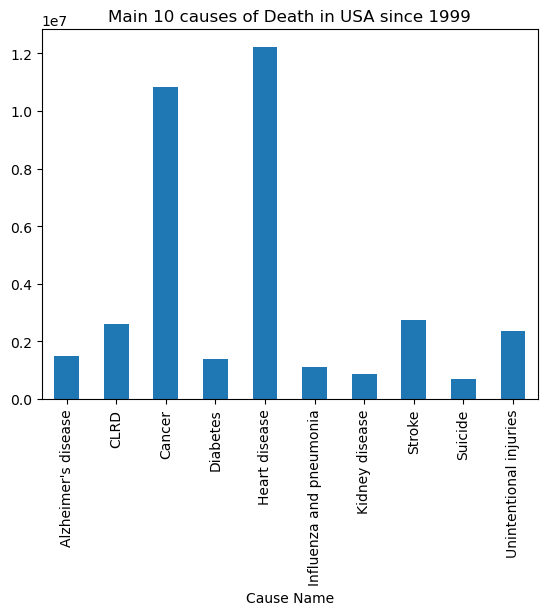

In [98]:
dCauses["Deaths"].plot.bar(title="Main 10 causes of Death in USA since 1999")



The top 3 causes of deaths in the
United States during this period are heart diseases, cancer, and strokes. 


However, these states have the highest population. Using the ratio of deaths per
population will give a better comparison